# Explore here

In [5]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Loading the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
columns_of_interest = ['Latitude', 'Longitude', 'MedInc']
total_data = pd.read_csv(url, usecols=columns_of_interest)

print(total_data.head(5))
print(f'Shape:{total_data.shape}')

   MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25
Shape:(20640, 3)


In [6]:
# Check for duplicates and missing values
duplicates = total_data.duplicated().sum()
nas = total_data.isnull().sum()

print("Duplicates found:", duplicates)
print("Missing values (NaNs):\n", nas)

Duplicates found: 5
Missing values (NaNs):
 MedInc       0
Latitude     0
Longitude    0
dtype: int64


In [10]:
print(total_data[total_data.duplicated()])
print("No legitimate duplicates found")

        MedInc  Latitude  Longitude
4571    2.3438     34.07    -118.27
4606   15.0001     34.07    -118.33
8852   15.0001     34.08    -118.42
8854   15.0001     34.07    -118.41
16331   4.3008     38.02    -121.33
No legitimate duplicates found


In [13]:

X_train, X_test = train_test_split(total_data, test_size=0.2, random_state=42)

# Let's print the shapes of the train and test sets to confirm the split.
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (16512, 4)
Test set shape: (4128, 4)


### Build K-Means

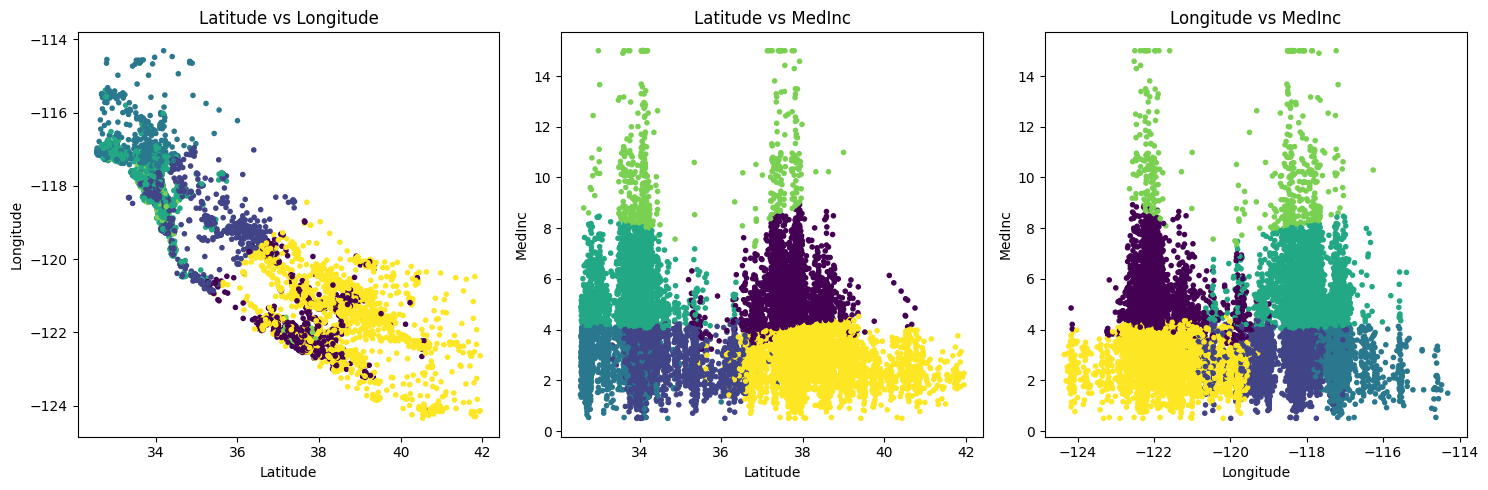

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#implement K-Means model
kmeans = KMeans(n_clusters=6, random_state=42)
X_train['cluster'] = kmeans.fit_predict(X_train)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Plotting Latitude vs Longitude
axis[0].scatter(X_train['Latitude'], X_train['Longitude'], c=X_train['cluster'], marker='.')
axis[0].set_title('Latitude vs Longitude')
axis[0].set_xlabel('Latitude')
axis[0].set_ylabel('Longitude')

# Plotting Latitude vs MedInc
axis[1].scatter(X_train['Latitude'], X_train['MedInc'], c=X_train['cluster'], marker='.')
axis[1].set_title('Latitude vs MedInc')
axis[1].set_xlabel('Latitude')
axis[1].set_ylabel('MedInc')

# Plotting Longitude vs MedInc
axis[2].scatter(X_train['Longitude'], X_train['MedInc'], c=X_train['cluster'], marker='.')
axis[2].set_title('Longitude vs MedInc')
axis[2].set_xlabel('Longitude')
axis[2].set_ylabel('MedInc')

plt.tight_layout()
plt.show()


### Predict with the test set

In [23]:
y_test = list(kmeans.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,1
3024,2.5313,35.14,-119.46,1
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,3
9814,3.7250,36.62,-121.93,5


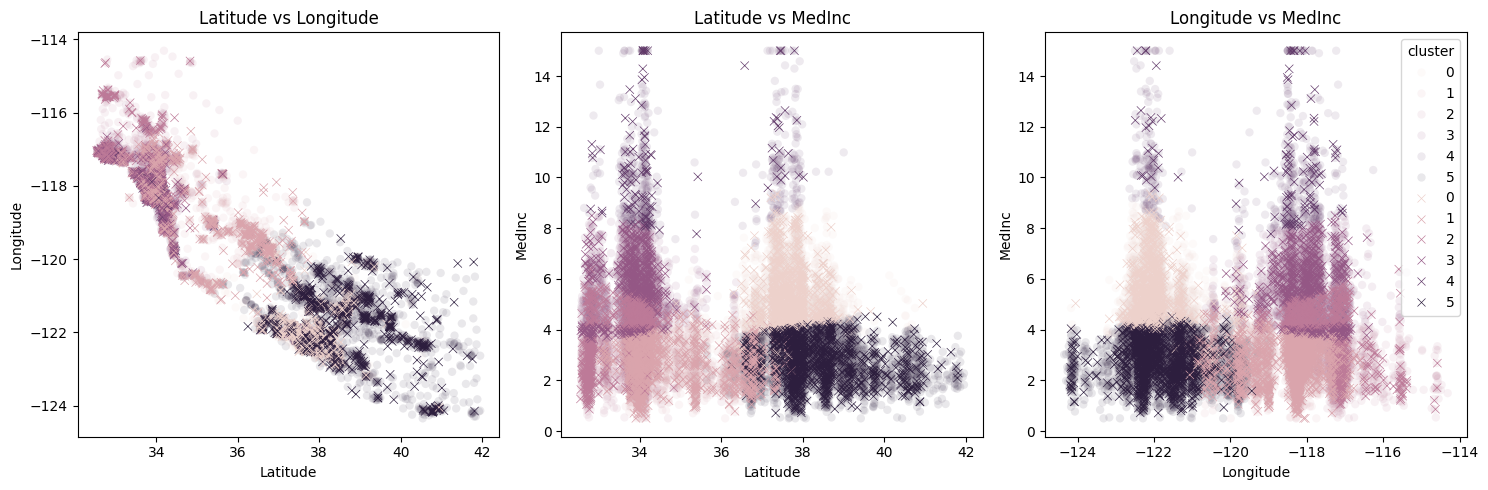

In [27]:
plt.figure(figsize=(15, 5))

# Plotting Latitude vs Longitude
plt.subplot(131)
sns.scatterplot(data=X_train, x="Latitude", y="Longitude", hue="cluster", alpha=0.1)
sns.scatterplot(data=X_test, x="Latitude", y="Longitude", hue="cluster", marker="x")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')
plt.legend([],[], frameon=False)

# Plotting Latitude vs MedInc
plt.subplot(132)
sns.scatterplot(data=X_train, x="Latitude", y="MedInc", hue="cluster", alpha=0.1)
sns.scatterplot(data=X_test, x="Latitude", y="MedInc", hue="cluster", marker="x")
plt.xlabel('Latitude')
plt.ylabel('MedInc')
plt.title('Latitude vs MedInc')
plt.legend([],[], frameon=False)

# Plotting Longitude vs MedInc
plt.subplot(133)
sns.scatterplot(data=X_train, x="Longitude", y="MedInc", hue="cluster", alpha=0.1)
sns.scatterplot(data=X_test, x="Longitude", y="MedInc", hue="cluster", marker="x")
plt.xlabel('Longitude')
plt.ylabel('MedInc')
plt.title('Longitude vs MedInc')

plt.tight_layout()
plt.show()


### Accuracy Metrics
- Silhouette Score: This metric measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- Inertia: Inertia measures the sum of squared distances of samples to their closest cluster center. It tells us how tightly the clusters are packed together. Lower inertia values indicate better clusters.

In [28]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for training data
silhouette_train = silhouette_score(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'])
print("Silhouette Score for training data:", silhouette_train)

inertia_train = kmeans.inertia_
print("Inertia for training data:", inertia_train)

Silhouette Score for training data: 0.3313149215222963
Inertia for training data: 37385.18671879298


### Train a supervised classification model

Logistic Regression

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Prepare the Data
X_train_features = X_train[['Latitude', 'Longitude', 'MedInc']]
y_train = X_train['cluster']
X_test_features = X_test[['Latitude', 'Longitude', 'MedInc']]
y_test = X_test['cluster']

# Define a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train the model
pipeline.fit(X_train[['MedInc', 'Latitude', 'Longitude']], X_train['cluster'])

# Evaluate the model
predictions = pipeline.predict(X_test[['MedInc', 'Latitude', 'Longitude']])

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       540
           1       0.93      0.78      0.85      1342
           2       0.49      0.31      0.38       685
           3       0.43      0.73      0.54       494
           4       0.93      0.93      0.93       106
           5       0.88      0.99      0.93       961

    accuracy                           0.77      4128
   macro avg       0.77      0.78      0.77      4128
weighted avg       0.79      0.77      0.77      4128



### Decision Trees

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 4: Train a supervised classification model - Decision Tree using Pipeline
decision_tree_pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# Train the model using the pipeline
decision_tree_pipeline.fit(X_train_features, y_train)

# Making predictions on the test set
y_pred_decision_tree_pipeline = decision_tree_pipeline.predict(X_test_features)

# Evaluating the model
accuracy_decision_tree_pipeline = accuracy_score(y_test, y_pred_decision_tree_pipeline)
print("Accuracy of Decision Tree using Pipeline:", accuracy_decision_tree_pipeline)


Accuracy of Decision Tree using Pipeline: 0.7650193798449613


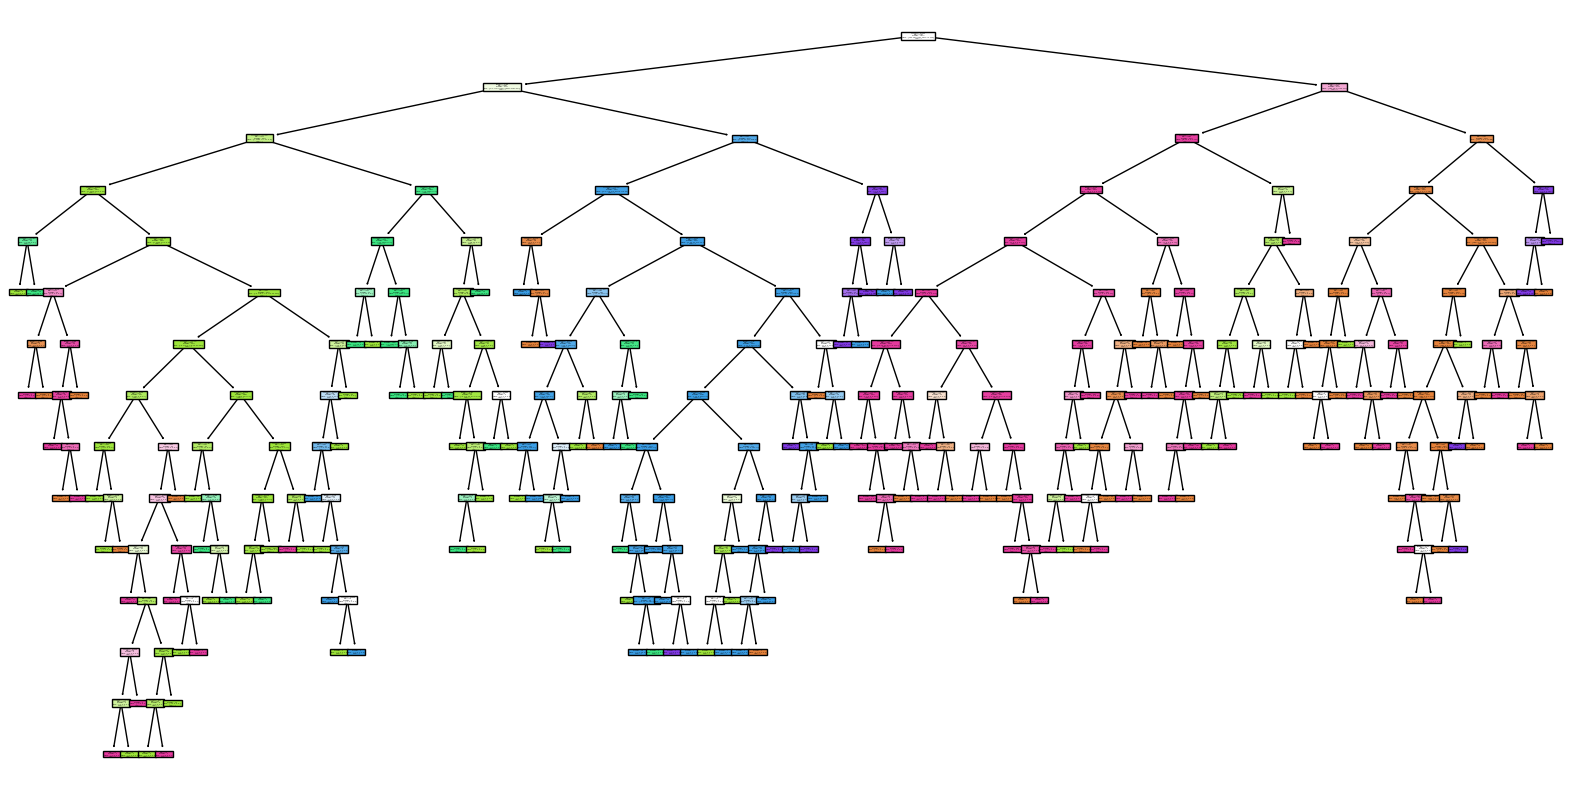

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_pipeline.named_steps['decision_tree'], feature_names=X_train_features.columns, class_names=["0", "1", "2", "3", "4", "5"], filled=True)
plt.show()

Saving

In [ ]:
import pickle

# Define the file paths
kmeans_model_path = "/workspaces/k-means/data/processed/kmeans_model.pkl"
decision_tree_model_path = "/workspaces/k-means/data/processed/decision_tree_model.pkl"

# Save the K-Means model
with open(kmeans_model_path, 'wb') as f:
    pickle.dump(kmeans, f)

# Save the Decision Tree model
with open(decision_tree_model_path, 'wb') as f:
    pickle.dump(decision_tree_pipeline, f)

